# Sena İrem Toka 090190361

# Q1

In [311]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import wbgapi as wb
import yfinance as yf
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import math
import scipy.stats as st
from sklearn.metrics import confusion_matrix, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from statsmodels.formula.api import logit,ols
from statsmodels.api import Logit
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.linear_model import LinearRegression

I got the data for the specified countries. There are some NaN values for each country but I have to clean them country by country as I am doing the operations otherwise dropping the NaN values wipe out the whole dataset.

In [312]:
data = wb.data.DataFrame(series = ['SE.ADT.LITR.FE.ZS','SL.TLF.ACTI.ZS','SP.DYN.IMRT.IN','SI.POV.GINI','SP.DYN.LE00.IN','NY.GDP.PCAP.CD'],
                         economy=['ALB', 'DZA', 'BIH', 'HRV', 'CYP', 'EGY', 'FRA', 'GRC', 'ISR', 'ITA', 'LBN', 'LBY', 'MLT', 'MCO', 'MNE', 'MAR','SVN', 'ESP', 'SYR', 'TUN', 'TUR']).T
data.rename(columns={'SE.ADT.LITR.FE.ZS':'literacy',
                     'SL.TLF.ACTI.ZS':'workforce',
                     'SP.DYN.IMRT.IN':'mortality',
                     'SI.POV.GINI':'gini',
                     'SP.DYN.LE00.IN':'lifeExpectancy',
                     'NY.GDP.PCAP.CD':'gdp'
                     }, inplace=True)
data


economy          ALB                                                      \
series           gdp   literacy  gini workforce mortality lifeExpectancy   
YR1960           NaN        NaN   NaN       NaN       NaN         54.439   
YR1961           NaN        NaN   NaN       NaN       NaN         55.634   
YR1962           NaN        NaN   NaN       NaN       NaN         56.671   
YR1963           NaN        NaN   NaN       NaN       NaN         57.844   
YR1964           NaN        NaN   NaN       NaN       NaN         58.983   
...              ...        ...   ...       ...       ...            ...   
YR2018   5287.660801        NaN  30.1    69.035       8.3         79.184   
YR2019   5396.214243        NaN  30.1    70.373       8.4         79.282   
YR2020   5343.037704        NaN  29.4    67.363       8.4         76.989   
YR2021   6377.203096        NaN   NaN    68.684       8.4         76.463   
YR2022   6810.114041  98.300003   NaN    71.367       NaN            NaN   

economy          BIH                            ...  TUN                      \
series           gdp   literacy gini workforce  ... gini workforce mortality   
YR1960           NaN        NaN  NaN       NaN  ...  NaN       NaN       NaN   
YR1961           NaN        NaN  NaN       NaN  ...  NaN       NaN       NaN   
YR1962           NaN        NaN  NaN       NaN  ...  NaN       NaN     181.7   
YR1963           NaN        NaN  NaN       NaN  ...  NaN       NaN     173.2   
YR1964           NaN        NaN  NaN       NaN  ...  NaN       NaN     165.0   
...              ...        ...  ...       ...  ...  ...       ...       ...   
YR2018   6024.493150        NaN  NaN    56.084  ...  NaN    51.733      14.6   
YR2019   6094.724823        NaN  NaN    57.265  ...  NaN    51.891      14.5   
YR2020   6095.104237        NaN  NaN    57.784  ...  NaN    49.715      14.3   
YR2021   7230.198838        NaN  NaN    60.999  ...  NaN    50.037      14.0   
YR2022   7568.798480  97.099998  NaN    61.552  ...  NaN    52.348       NaN   

economy                          TUR                                       \
series  lifeExpectancy           gdp   literacy  gini workforce mortality   
YR1960          43.940    275.041699        NaN   NaN       NaN     171.5   
YR1961          44.146    282.742464        NaN   NaN       NaN     166.2   
YR1962          45.513    307.306286        NaN   NaN       NaN     160.8   
YR1963          46.500    347.177091        NaN   NaN       NaN     155.5   
YR1964          47.365    365.133869        NaN   NaN       NaN     150.4   
...                ...           ...        ...   ...       ...       ...   
YR2018          75.950   9568.836190        NaN  41.9    57.714       9.2   
YR2019          75.993   9215.440875  94.424042  41.9    57.710       8.6   
YR2020          75.292   8638.739133        NaN   NaN    54.048       8.1   
YR2021          73.772   9743.213131        NaN   NaN    56.321       7.7   
YR2022             NaN  10674.504173        NaN   NaN    58.314       NaN   

economy                 
series  lifeExpectancy  
YR1960          50.740  
YR1961          51.550  
YR1962          52.382  
YR1963          53.173  
YR1964          53.714  
...                ...  
YR2018          77.563  
YR2019          77.832  
YR2020          75.850  
YR2021          76.032  
YR2022             NaN  

[63 rows x 126 columns]

### I wrote a function to do the log(mortality) and the linear regression. However, I realized that some of the countries, for example France, does not have data in its literacy column. Syria and Israel also don't have data in their literacy and gini index columns. So to be able to do the linear regression I have to drop the columns that have no data in them. And I used different functions for the ones that I dropped the columns.


In [313]:
def function1(df):
    df.dropna(inplace=True)
    df['mortality'] = np.log(df['mortality']) 
    model = ols('mortality ~  gdp + literacy + gini + workforce + lifeExpectancy', data=df).fit() 
    return model


In [314]:
def function2(df):
    df.dropna(inplace=True)
    df['mortality'] = np.log(df['mortality']) 
    model = ols('mortality ~ gdp + gini + workforce + lifeExpectancy', data=df).fit() 
    return model


In [315]:
def function3(df):
    df.dropna(inplace=True)
    df['mortality'] = np.log(df['mortality']) 
    model = ols('mortality ~ gdp + workforce + lifeExpectancy', data=df).fit() 
    return model


Since Turkey has all the data present, I tried to do the LR with all the other variables.

In [316]:
tur= data["TUR"]


In [317]:
tur.corr()

series,gdp,literacy,gini,workforce,mortality,lifeExpectancy
series,,,,,,
gdp,1.000000,0.932083,-0.421825,-0.194620,-0.817557,0.854886
literacy,0.932083,1.000000,0.327856,0.947211,-0.977320,0.987696
gini,-0.421825,0.327856,1.000000,0.517367,0.321747,-0.208980
workforce,-0.194620,0.947211,0.517367,1.000000,0.306516,-0.203492
mortality,-0.817557,-0.977320,0.321747,0.306516,1.000000,-0.996245
lifeExpectancy,0.854886,0.987696,-0.208980,-0.203492,-0.996245,1.000000


### First I used the function and built the model with all the variables except mortality.

In [318]:
model = function1(tur)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     228.2
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.10e-08
Time:                        21:14:02   Log-Likelihood:                 31.594
No. Observations:                  14   AIC:                            -51.19
Df Residuals:                       8   BIC:                            -47.35
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.1101      1.799      7.

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3984719312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3984719312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mortality'] = np.log(df['mortality'])
/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,0.578033,0.578033,514.679985,1.509909e-08
literacy,1.0,0.641524,0.641524,571.212418,1.000645e-08
gini,1.0,0.002102,0.002102,1.871708,2.084686e-01
workforce,1.0,0.039765,0.039765,35.406548,3.418477e-04
lifeExpectancy,1.0,0.019820,0.019820,17.648075,2.992581e-03
Residual,8.0,0.008985,0.001123,NaN,NaN


### For Turkey, literacy and gdp looks like the most important variables. So I built another model using only those two to see they are good enough to be able to explain mortality and the R square values came out quite high.

In [319]:
tur.dropna(inplace=True)
tur['mortality'] = np.log(tur['mortality']) 
model = ols('mortality ~ literacy + gdp ', data=tur).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     82.91
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.32e-07
Time:                        21:15:19   Log-Likelihood:                 29.907
No. Observations:                  14   AIC:                            -53.81
Df Residuals:                      11   BIC:                            -51.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0137      0.175     17.200      0.0

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3143930186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tur.dropna(inplace=True)
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3143930186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tur['mortality'] = np.log(tur['mortality'])
/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,0.164976,0.164976,158.734739,7.039913e-08
gdp,1.0,0.007368,0.007368,7.088855,2.208826e-02
Residual,11.0,0.011433,0.001039,NaN,NaN


### With the two variable model, literacy seems like it is more important than gdp. So I built another model if mortality can be explained by using only literacy for Turkey and the decrease in the R square values are not too significant.

In [206]:
tur.dropna(inplace=True)
tur['mortality'] = np.log(tur['mortality']) 
model = ols('mortality ~ literacy', data=tur).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     105.3
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.71e-07
Time:                        13:47:28   Log-Likelihood:                 26.426
No. Observations:                  14   AIC:                            -48.85
Df Residuals:                      12   BIC:                            -47.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7333      0.172     15.899      0.0

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/1437695580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tur.dropna(inplace=True)
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/1437695580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tur['mortality'] = np.log(tur['mortality'])
/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,0.164976,0.164976,105.303342,2.707046e-07
Residual,12.0,0.018800,0.001567,NaN,NaN


In [320]:
esp = data["ESP"]

In [321]:
esp.corr()

series,gdp,literacy,gini,workforce,mortality,lifeExpectancy
series,,,,,,
gdp,1.000000,0.855550,0.086382,0.929181,-0.763523,0.937576
literacy,0.855550,1.000000,0.511491,0.848523,-0.980222,0.873224
gini,0.086382,0.511491,1.000000,0.018755,-0.176074,0.280891
workforce,0.929181,0.848523,0.018755,1.000000,-0.949920,0.960275
mortality,-0.763523,-0.980222,-0.176074,-0.949920,1.000000,-0.905774
lifeExpectancy,0.937576,0.873224,0.280891,0.960275,-0.905774,1.000000


### Using all the variables, I built the LR model for Spain. 

In [322]:
model = function1(esp)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     35.38
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.18e-05
Time:                        21:19:36   Log-Likelihood:                 31.505
No. Observations:                  15   AIC:                            -51.01
Df Residuals:                       9   BIC:                            -46.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.5116      2.590      6.

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3984719312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3984719312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mortality'] = np.log(df['mortality'])
/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,0.001371,0.001371,0.937779,3.581514e-01
literacy,1.0,0.200708,0.200708,137.256583,9.442447e-07
gini,1.0,0.052106,0.052106,35.633300,2.102654e-04
workforce,1.0,0.001933,0.001933,1.322205,2.798337e-01
lifeExpectancy,1.0,0.002562,0.002562,1.751999,2.182599e-01
Residual,9.0,0.013161,0.001462,NaN,NaN


### For Spain, the most important variables look like literacy and gini. So I tried to see if only those two are enough for the LR model for Spain. And the R-squared value came out quite good.

In [323]:
esp.dropna(inplace=True)
esp['mortality'] = np.log(esp['mortality']) 
model = ols('mortality ~ literacy + gini ', data=esp).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     75.69
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.57e-07
Time:                        21:19:50   Log-Likelihood:                 30.553
No. Observations:                  15   AIC:                            -55.11
Df Residuals:                      12   BIC:                            -52.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9546      2.038      8.321      0.0

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3410217241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esp.dropna(inplace=True)
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/3410217241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esp['mortality'] = np.log(esp['mortality'])
/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,0.154485,0.154485,124.070346,1.103847e-07
gini,1.0,0.034006,0.034006,27.310712,2.126226e-04
Residual,12.0,0.014942,0.001245,NaN,NaN


### However, only using literacy gives a worse R squared value. So we can say that we probably need both  literacy and gini variables for the LR model for Spain.

In [324]:
esp.dropna(inplace=True)
esp['mortality'] = np.log(esp['mortality']) 
model = ols('mortality ~ literacy', data=esp).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     16.26
Date:                Sun, 24 Mar 2024   Prob (F-statistic):            0.00239
Time:                        21:19:57   Log-Likelihood:                -9.0387
No. Observations:                  12   AIC:                             22.08
Df Residuals:                      10   BIC:                             23.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    184.9003     46.378      3.987      0.0

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/1403353215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esp.dropna(inplace=True)
/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_9911/1403353215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esp['mortality'] = np.log(esp['mortality'])
/Applications/anaconda3/lib/python3.11/site-packages/scipy/st

,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,5.152832,5.152832,16.259145,0.002391
Residual,10.0,3.169190,0.316919,NaN,NaN


### For France, there were no data in the literacy column, therefore I dropped it and constructed the model with the other available variables with the function I had.

In [325]:
fra = data["FRA"]
fra

series,gdp,literacy,gini,workforce,mortality,lifeExpectancy
YR1960,1333.881573,NaN,NaN,NaN,23.6,69.868293
YR1961,1430.434624,NaN,NaN,NaN,22.4,70.117073
YR1962,1585.735311,NaN,NaN,NaN,21.4,70.314634
YR1963,1758.856659,NaN,NaN,NaN,20.4,70.514634
YR1964,1928.999402,NaN,NaN,NaN,19.4,70.663415
...,...,...,...,...,...,...
YR2018,41557.854859,NaN,32.4,72.568,3.4,82.675610
YR2019,40494.898294,NaN,31.2,72.372,3.4,82.826829
YR2020,39179.744260,NaN,30.7,71.704,3.4,82.175610
YR2021,43671.308410,NaN,NaN,73.705,3.4,82.324390


In [326]:
fra.corr()

series,gdp,literacy,gini,workforce,mortality,lifeExpectancy
series,,,,,,
gdp,1.000000,NaN,-0.523738,0.789432,-0.883921,0.979236
literacy,NaN,NaN,NaN,NaN,NaN,NaN
gini,-0.523738,NaN,1.000000,0.033874,0.744426,-0.597313
workforce,0.789432,NaN,0.033874,1.000000,-0.787194,0.936699
mortality,-0.883921,NaN,0.744426,-0.787194,1.000000,-0.936331
lifeExpectancy,0.979236,NaN,-0.597313,0.936699,-0.936331,1.000000


### gdp seems to be the most important variable for this model and the R squared values seem to be not too great so I did not eliminate variables and build another model. 

In [327]:
fra = fra.drop(columns=['literacy'])
model = function2(fra)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     20.13
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.76e-07
Time:                        21:20:53   Log-Likelihood:                 34.906
No. Observations:                  25   AIC:                            -59.81
Df Residuals:                      20   BIC:                            -53.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8585      1.427      3.

,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,0.331415,0.331415,73.909422,3.767130e-08
gini,1.0,0.001293,0.001293,0.288397,5.971742e-01
workforce,1.0,0.008107,0.008107,1.808039,1.937962e-01
lifeExpectancy,1.0,0.020228,0.020228,4.511033,4.634122e-02
Residual,20.0,0.089681,0.004484,NaN,NaN


### The literacy and gini columns had no data for Syria, therefore I constructed the model with the other variables. However especially literacy seems like an important variable to explain the mortality because in the other countries that had the literacy data, the R squared values came out much better. 

In [328]:
syr=data["SYR"]
syr = syr.drop(columns=['literacy', 'gini'])
model = function3(syr)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     39.08
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           5.81e-10
Time:                        21:28:32   Log-Likelihood:                 33.263
No. Observations:                  31   AIC:                            -58.53
Df Residuals:                      27   BIC:                            -52.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7588      0.522     11.

,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,0.459988,0.459988,58.510372,3.155841e-08
workforce,1.0,0.137638,0.137638,17.507550,2.714179e-04
lifeExpectancy,1.0,0.323989,0.323989,41.211299,7.057720e-07
Residual,27.0,0.212265,0.007862,NaN,NaN


In [212]:
syr.corr()

series,gdp,workforce,mortality,lifeExpectancy
series,,,,
gdp,1.000000,0.372656,-0.636927,0.671299
workforce,0.372656,1.000000,0.085956,0.356526
mortality,-0.636927,0.085956,1.000000,-0.779064
lifeExpectancy,0.671299,0.356526,-0.779064,1.000000


In [213]:
isr=data["ISR"]
isr = isr.drop(columns=['literacy', 'gini'])
model = function3(isr)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1085.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           6.72e-25
Time:                        13:52:14   Log-Likelihood:                 61.852
No. Observations:                  27   AIC:                            -115.7
Df Residuals:                      23   BIC:                            -110.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.2597      0.539     24.

,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,1.969977,1.969977,2799.390676,1.569511e-25
workforce,1.0,0.048572,0.048572,69.021713,2.230071e-08
lifeExpectancy,1.0,0.271187,0.271187,385.363447,7.256801e-16
Residual,23.0,0.016185,0.000704,NaN,NaN


### For Israel, gdp seems like the most important variable to explain the mortality since it doesn't have the literacy and gini index data.

In [214]:
isr.corr()

series,gdp,workforce,mortality,lifeExpectancy
series,,,,
gdp,1.000000,0.819555,-0.924290,0.895304
workforce,0.819555,1.000000,-0.840669,0.846807
mortality,-0.924290,-0.840669,1.000000,-0.993117
lifeExpectancy,0.895304,0.846807,-0.993117,1.000000


### For the other two countries I decided to use Greece and Italy. I looked for the countries that had the literacy data since it seems like an important variable but there were none. So I chose Greece and Italy since they had only the literacy column missing. 

In [330]:
grc = data["GRC"]
grc = grc.drop(columns=['literacy'])
model = function2(grc)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     61.77
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.89e-09
Time:                        21:30:15   Log-Likelihood:                 33.761
No. Observations:                  20   AIC:                            -57.52
Df Residuals:                      15   BIC:                            -52.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.6155      0.877      9.

,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,0.298708,0.298708,111.939477,2.367616e-08
gini,1.0,0.016463,0.016463,6.169313,2.530093e-02
workforce,1.0,0.336047,0.336047,125.932257,1.074502e-08
lifeExpectancy,1.0,0.008079,0.008079,3.027650,1.023265e-01
Residual,15.0,0.040027,0.002668,NaN,NaN


### For Greece it seems like workforce and gdp are important variables. I had a function using these two variables so I tried it and the R squared values were good

In [331]:
grc.dropna(inplace=True)
grc['mortality'] = np.log(grc['mortality']) 
model = ols('mortality ~ workforce + gdp ', data=grc).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     81.02
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.03e-09
Time:                        21:30:18   Log-Likelihood:                 37.362
No. Observations:                  20   AIC:                            -68.72
Df Residuals:                      17   BIC:                            -65.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6601      0.442     10.536      0.0

,df,sum_sq,mean_sq,F,PR(>F)
workforce,1.0,0.247223,0.247223,150.519866,7.165931e-10
gdp,1.0,0.018937,0.018937,11.529486,3.441056e-03
Residual,17.0,0.027922,0.001642,NaN,NaN


### I tried to build the model for only workforce since it seemed more important than gdp. However, the R-squared values dropped mildly.

In [335]:
model = ols('mortality ~ workforce', data=grc).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     94.97
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.33e-08
Time:                        21:31:44   Log-Likelihood:                 32.185
No. Observations:                  20   AIC:                            -60.37
Df Residuals:                      18   BIC:                            -58.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2670      0.509     10.341      0.0

,df,sum_sq,mean_sq,F,PR(>F)
workforce,1.0,0.247223,0.247223,94.966927,1.326854e-08
Residual,18.0,0.046859,0.002603,NaN,NaN


### For Italy, it seems like gdp is the most important variable along with workforce and gini.

In [336]:
ita = data["ITA"]
ita = ita.drop(columns=['literacy'])
model = function2(ita)
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     80.37
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.15e-11
Time:                        21:38:40   Log-Likelihood:                 27.705
No. Observations:                  23   AIC:                            -45.41
Df Residuals:                      18   BIC:                            -39.73
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.5524      1.332     10.

,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,1.329965,1.329965,197.758026,3.775588e-11
gini,1.0,0.367778,0.367778,54.686384,7.371155e-07
workforce,1.0,0.418567,0.418567,62.238469,2.987837e-07
lifeExpectancy,1.0,0.045684,0.045684,6.792999,1.785971e-02
Residual,18.0,0.121054,0.006725,NaN,NaN


In [337]:
ita.corr()

series,gdp,gini,workforce,mortality,lifeExpectancy
series,,,,,
gdp,1.000000,-0.210163,0.672908,-0.763243,0.781257
gini,-0.210163,1.000000,0.001352,-0.231992,0.217199
workforce,0.672908,0.001352,1.000000,-0.882706,0.890742
mortality,-0.763243,-0.231992,-0.882706,1.000000,-0.968526
lifeExpectancy,0.781257,0.217199,0.890742,-0.968526,1.000000


### So when I rebuilt the model with the most important variables, I think the model is good enough.  

In [338]:
ita.dropna(inplace=True)
ita['mortality'] = np.log(ita['mortality']) 
model = ols('mortality ~ gdp + workforce + gini ', data=ita).fit() 
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     69.16
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.07e-10
Time:                        21:38:44   Log-Likelihood:                 30.391
No. Observations:                  23   AIC:                            -52.78
Df Residuals:                      19   BIC:                            -48.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1574      0.668     10.719      0.0

,df,sum_sq,mean_sq,F,PR(>F)
gdp,1.0,0.599974,0.599974,118.941773,1.278887e-09
workforce,1.0,0.351856,0.351856,69.753769,8.791602e-08
gini,1.0,0.094793,0.094793,18.792285,3.567675e-04
Residual,19.0,0.095841,0.005044,NaN,NaN


# Q2

In [339]:
data = yf.download(["SI=F", "HG=F", "PL=F", "GC=F", "PA=F"])
data

[*********************100%%**********************]  5 of 5 completed


Price         Adj Close                                              \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F   
Date                                                                  
2000-01-04          NaN     NaN   441.899994  429.700012        NaN   
2000-01-05          NaN     NaN   438.100006  419.899994        NaN   
2000-01-06          NaN     NaN   435.299988  412.000000        NaN   
2000-01-07          NaN     NaN   443.899994  414.000000        NaN   
2000-01-10          NaN     NaN   451.950012  415.000000        NaN   
...                 ...     ...          ...         ...        ...   
2024-03-18  2160.699951  4.1145  1035.599976  918.500000  25.091000   
2024-03-19  2156.300049  4.0585   993.900024  898.900024  24.964001   
2024-03-20  2157.899902  4.0385   994.700012  897.099976  24.933001   
2024-03-21  2182.399902  4.0465  1013.400024  910.700012  24.849001   
2024-03-22  2166.500000  3.9970   992.000000  898.700012  24.840000   

Price             Close                                              ...  \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F  ...   
Date                                                                 ...   
2000-01-04          NaN     NaN   441.899994  429.700012        NaN  ...   
2000-01-05          NaN     NaN   438.100006  419.899994        NaN  ...   
2000-01-06          NaN     NaN   435.299988  412.000000        NaN  ...   
2000-01-07          NaN     NaN   443.899994  414.000000        NaN  ...   
2000-01-10          NaN     NaN   451.950012  415.000000        NaN  ...   
...                 ...     ...          ...         ...        ...  ...   
2024-03-18  2160.699951  4.1145  1035.599976  918.500000  25.091000  ...   
2024-03-19  2156.300049  4.0585   993.900024  898.900024  24.964001  ...   
2024-03-20  2157.899902  4.0385   994.700012  897.099976  24.933001  ...   
2024-03-21  2182.399902  4.0465  1013.400024  910.700012  24.849001  ...   
2024-03-22  2166.500000  3.9970   992.000000  898.700012  24.840000  ...   

Price              Open                                                Volume  \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F      GC=F   
Date                                                                            
2000-01-04          NaN     NaN   445.000000  428.000000        NaN       NaN   
2000-01-05          NaN     NaN   436.000000  428.000000        NaN       NaN   
2000-01-06          NaN     NaN   434.500000  415.000000        NaN       NaN   
2000-01-07          NaN     NaN   437.000000  408.000000        NaN       NaN   
2000-01-10          NaN     NaN   443.899994  414.000000        NaN       NaN   
...                 ...     ...          ...         ...        ...       ...   
2024-03-18  2146.199951  4.1050  1035.599976  918.500000  25.160000      21.0   
2024-03-19  2156.100098  4.1145   993.900024  898.900024  25.170000      12.0   
2024-03-20  2157.300049  4.0650   994.700012  897.099976  24.933001      17.0   
2024-03-21  2207.000000  4.0860  1013.400024  910.700012  25.625000      63.0   
2024-03-22  2183.399902  4.0655  1017.000000  911.299988  24.920000  200525.0   

Price                                          
Ticker         HG=F    PA=F     PL=F     SI=F  
Date                                           
2000-01-04      NaN   177.0    632.0      NaN  
2000-01-05      NaN   319.0    571.0      NaN  
2000-01-06      NaN   180.0    494.0      NaN  
2000-01-07      NaN   102.0    130.0      NaN  
2000-01-10      NaN   143.0     24.0      NaN  
...             ...     ...      ...      ...  
2024-03-18    950.0     0.0      0.0     26.0  
2024-03-19    978.0     0.0      0.0     20.0  
2024-03-20    776.0     1.0      0.0     75.0  
2024-03-21    867.0     0.0      0.0     69.0  
2024-03-22  87273.0  2456.0  27173.0  55996.0  

[6087 rows x 30 columns]

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6087 entries, 2000-01-04 to 2024-03-22
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GC=F)  5913 non-null   float64
 1   (Adj Close, HG=F)  5916 non-null   float64
 2   (Adj Close, PA=F)  5620 non-null   float64
 3   (Adj Close, PL=F)  5380 non-null   float64
 4   (Adj Close, SI=F)  5913 non-null   float64
 5   (Close, GC=F)      5913 non-null   float64
 6   (Close, HG=F)      5916 non-null   float64
 7   (Close, PA=F)      5620 non-null   float64
 8   (Close, PL=F)      5380 non-null   float64
 9   (Close, SI=F)      5913 non-null   float64
 10  (High, GC=F)       5913 non-null   float64
 11  (High, HG=F)       5916 non-null   float64
 12  (High, PA=F)       5620 non-null   float64
 13  (High, PL=F)       5380 non-null   float64
 14  (High, SI=F)       5913 non-null   float64
 15  (Low, GC=F)        5913 non-null   float64
 16  (Low, 

### I imported the data as specified in the question. Since there were too many columns and I thought we need the open and close data for the future. I dropped the other columns  and I renamed the columns to reach them easier, I looked at the correlation between the variables to see which ones would be useful to explain the future gold closing prices.

In [340]:
data = data[['Open','Close']].dropna()
data

Price              Open                                              \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F   
Date                                                                  
2000-08-30   273.899994  0.8790   717.000000  593.900024   4.950000   
2000-08-31   274.799988  0.8850   710.000000  589.000000   4.920000   
2000-09-01   277.000000  0.8780   710.000000  588.000000   5.035000   
2000-09-05   275.799988  0.8960   710.000000  602.000000   4.990000   
2000-09-06   274.200012  0.9050   720.650024  603.000000   5.000000   
...                 ...     ...          ...         ...        ...   
2024-03-18  2146.199951  4.1050  1035.599976  918.500000  25.160000   
2024-03-19  2156.100098  4.1145   993.900024  898.900024  25.170000   
2024-03-20  2157.300049  4.0650   994.700012  897.099976  24.933001   
2024-03-21  2207.000000  4.0860  1013.400024  910.700012  25.625000   
2024-03-22  2183.399902  4.0655  1017.000000  911.299988  24.920000   

Price             Close                                              
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F  
Date                                                                 
2000-08-30   273.899994  0.8850   711.049988  591.400024   4.930000  
2000-08-31   278.299988  0.8850   716.750000  586.700012   5.003000  
2000-09-01   277.000000  0.8890   724.700012  595.299988   5.004000  
2000-09-05   275.799988  0.9060   720.650024  601.299988   4.998000  
2000-09-06   274.200012  0.9015   738.000000  611.099976   4.983000  
...                 ...     ...          ...         ...        ...  
2024-03-18  2160.699951  4.1145  1035.599976  918.500000  25.091000  
2024-03-19  2156.300049  4.0585   993.900024  898.900024  24.964001  
2024-03-20  2157.899902  4.0385   994.700012  897.099976  24.933001  
2024-03-21  2182.399902  4.0465  1013.400024  910.700012  24.849001  
2024-03-22  2166.500000  3.9970   992.000000  898.700012  24.840000  

[4948 rows x 10 columns]

In [341]:
print(data.columns)

MultiIndex([( 'Open', 'GC=F'),
            ( 'Open', 'HG=F'),
            ( 'Open', 'PA=F'),
            ( 'Open', 'PL=F'),
            ( 'Open', 'SI=F'),
            ('Close', 'GC=F'),
            ('Close', 'HG=F'),
            ('Close', 'PA=F'),
            ('Close', 'PL=F'),
            ('Close', 'SI=F')],
           names=['Price', 'Ticker'])


In [342]:
data.columns = ['gold_o','copper_o','palladium_o','platinum_o','silver_o',
                'gold_c','copper_c','palladium_c','platinum_c','silver_c']
data

,gold_o,copper_o,palladium_o,platinum_o,silver_o,gold_c,copper_c,palladium_c,platinum_c,silver_c
Date,,,,,,,,,,
2000-08-30,273.899994,0.8790,717.000000,593.900024,4.950000,273.899994,0.8850,711.049988,591.400024,4.930000
2000-08-31,274.799988,0.8850,710.000000,589.000000,4.920000,278.299988,0.8850,716.750000,586.700012,5.003000
2000-09-01,277.000000,0.8780,710.000000,588.000000,5.035000,277.000000,0.8890,724.700012,595.299988,5.004000
2000-09-05,275.799988,0.8960,710.000000,602.000000,4.990000,275.799988,0.9060,720.650024,601.299988,4.998000
2000-09-06,274.200012,0.9050,720.650024,603.000000,5.000000,274.200012,0.9015,738.000000,611.099976,4.983000
...,...,...,...,...,...,...,...,...,...,...
2024-03-18,2146.199951,4.1050,1035.599976,918.500000,25.160000,2160.699951,4.1145,1035.599976,918.500000,25.091000
2024-03-19,2156.100098,4.1145,993.900024,898.900024,25.170000,2156.300049,4.0585,993.900024,898.900024,24.964001
2024-03-20,2157.300049,4.0650,994.700012,897.099976,24.933001,2157.899902,4.0385,994.700012,897.099976,24.933001


In [343]:
data.corr()

,gold_o,copper_o,palladium_o,platinum_o,silver_o,gold_c,copper_c,palladium_c,platinum_c,silver_c
gold_o,1.000000,0.876195,0.692402,0.475349,0.861003,0.999776,0.875566,0.692827,0.475130,0.860831
copper_o,0.876195,1.000000,0.546281,0.693268,0.877810,0.876139,0.999464,0.546646,0.693018,0.877975
palladium_o,0.692402,0.546281,1.000000,-0.037769,0.420776,0.692776,0.546519,0.999779,-0.038089,0.420688
platinum_o,0.475349,0.693268,-0.037769,1.000000,0.766860,0.475126,0.692923,-0.037393,0.999716,0.767145
silver_o,0.861003,0.877810,0.420776,0.766860,1.000000,0.860735,0.876904,0.421324,0.766849,0.999312
gold_c,0.999776,0.876139,0.692776,0.475126,0.860735,1.000000,0.875667,0.693265,0.475028,0.861033
copper_c,0.875566,0.999464,0.546519,0.692923,0.876904,0.875667,1.000000,0.546985,0.692802,0.877439
palladium_c,0.692827,0.546646,0.999779,-0.037393,0.421324,0.693265,0.546985,1.000000,-0.037672,0.421327
platinum_c,0.475130,0.693018,-0.038089,0.999716,0.766849,0.475028,0.692802,-0.037672,1.000000,0.767284
silver_c,0.860831,0.877975,0.420688,0.767145,0.999312,0.861033,0.877439,0.421327,0.767284,1.000000


### I couldn't decide if I should include the closing prices also in the model however the R-squared values always came out as 1. So I just used the opening prices. 

In [345]:
model = ols('gold_c ~  gold_o + copper_o + palladium_o +platinum_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gold_c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.763e+06
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:53:42   Log-Likelihood:                -19120.
No. Observations:                4948   AIC:                         3.825e+04
Df Residuals:                    4943   BIC:                         3.828e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1134      0.615     -0.184      0.854      -1.320       1.093
gold_o          0.9982      0.001   1356.666      0.000       0.997       1.000
copper_o        0.3462      0.421      0.823      0.410      -0.478       1.171
palladium_o     0.0010      0.000      2.254      0.024       0.000       0.002
platinum_o      0.0003      0.001      0.296      0.767      -0.001       0.002
==============================================================================
Omnibus:                     1435.677   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26234.902
Skew:                          -0.913   Prob(JB):                         0.00
Kurtosis:                      14.132   Cond. No.                     7.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [346]:
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
gold_o,1.0,1.471779e+09,1.471779e+09,1.105170e+07,0.000000
copper_o,1.0,1.249841e+02,1.249841e+02,9.385153e-01,0.332707
palladium_o,1.0,9.316361e+02,9.316361e+02,6.995726e+00,0.008196
platinum_o,1.0,1.166171e+01,1.166171e+01,8.756865e-02,0.767304
Residual,4943.0,6.582701e+05,1.331722e+02,NaN,NaN


### gold opening price is very significantly more important compared to the other variables I used. So I wanted to see if using only gold_o is enough for the model and it looks like it is.  

In [347]:
model = ols('gold_c ~  gold_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gold_c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.104e+07
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:53:47   Log-Likelihood:                -19124.
No. Observations:                4948   AIC:                         3.825e+04
Df Residuals:                    4946   BIC:                         3.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1957      0.395      0.496      0.620      -0.578       0.970
gold_o         0.9997      0.000   3322.723      0.000       0.999       1.000
==============================================================================
Omnibus:                     1440.173   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26165.178
Skew:                          -0.919   Prob(JB):                         0.00
Kurtosis:                      14.114   Cond. No.                     3.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [348]:
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
gold_o,1.0,1.471779e+09,1.471779e+09,1.104049e+07,0.0
Residual,4946.0,6.593384e+05,1.333074e+02,NaN,NaN


### When I added the interaction terms one by one, the R squared value was always 1 but I decided to use all of them and in the anova table below it seems like again, only gold opening price is the significant most important variable. 

In [355]:
model = ols('gold_c ~  gold_o * copper_o * palladium_o * platinum_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gold_c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.380e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:54:31   Log-Likelihood:                -19111.
No. Observations:                4948   AIC:                         3.825e+04
Df Residuals:                    4932   BIC:                         3.836e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -2.7331      6.659     -0.410      0.682     -15.788      10.322
gold_o                                     0.9981      0.011     94.068      0.000       0.977       1.019
copper_o                                  -1.5150      3.584     -0.423      0.673      -8.542       5.512
gold_o:copper_o                            0.0026      0.003      0.810      0.418      -0.004       0.009
palladium_o                                0.0039      0.017      0.227      0.821      -0.030       0.038
gold_o:palladium_o                      4.642e-06   1.35e-05      0.344      0.731   -2.18e-05    3.11e-05
copper_o:palladium_o                      -0.0014      0.006     -0.221      0.825      -0.013       0.011
gold_o:copper_o:palladium_o              -1.7e-06      4e-06     -0.425      0.671   -9.54e-06    6.14e-06
platinum_o                                 0.0092      0.009      0.986      0.324      -0.009       0.028
gold_o:platinum_o                      -3.033e-06   1.01e-05     -0.300      0.764   -2.29e-05    1.68e-05
copper_o:platinum_o                       -0.0021      0.003     -0.630      0.528      -0.009       0.004
gold_o:copper_o:platinum_o             -2.754e-07   2.69e-06     -0.102      0.919   -5.55e-06       5e-06
palladium_o:platinum_o                 -1.062e-05    2.7e-05     -0.393      0.694   -6.36e-05    4.23e-05
gold_o:palladium_o:platinum_o          -1.192e-09   1.76e-08     -0.068      0.946   -3.56e-08    3.33e-08
copper_o:palladium_o:platinum_o         6.244e-06   7.97e-06      0.784      0.433   -9.37e-06    2.19e-05
gold_o:copper_o:palladium_o:platinum_o -9.216e-10   4.73e-09     -0.195      0.846   -1.02e-08    8.36e-09
==============================================================================
Omnibus:                     1374.400   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24793.566
Skew:                          -0.858   Prob(JB):                         0.00
Kurtosis:                      13.831   Cond. No.                     3.25e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
gold_o,1.0,1.471779e+09,1.471779e+09,1.107012e+07,0.000000
copper_o,1.0,1.249841e+02,1.249841e+02,9.400793e-01,0.332305
gold_o:copper_o,1.0,7.882377e+00,7.882377e+00,5.928801e-02,0.807635
palladium_o,1.0,9.725789e+02,9.725789e+02,7.315339e+00,0.006860
gold_o:palladium_o,1.0,1.237035e+02,1.237035e+02,9.304472e-01,0.334794
copper_o:palladium_o,1.0,3.679079e+02,3.679079e+02,2.767252e+00,0.096275
gold_o:copper_o:palladium_o,1.0,7.819911e+02,7.819911e+02,5.881816e+00,0.015334
platinum_o,1.0,5.984623e+00,5.984623e+00,4.501388e-02,0.831987
gold_o:platinum_o,1.0,3.968216e+02,3.968216e+02,2.984730e+00,0.084116
copper_o:platinum_o,1.0,1.303957e+02,1.303957e+02,9.807833e-01,0.322054


### I applied the same approach to all the precious metals.

In [241]:
model = ols('copper_c ~  copper_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               copper_c   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.610e+06
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:07   Log-Likelihood:                 9286.4
No. Observations:                4948   AIC:                        -1.857e+04
Df Residuals:                    4946   BIC:                        -1.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.001      1.706      0.088      -0.000       0.005
copper_o       0.9994      0.000   2147.150      0.000       0.999       1.000
==============================================================================
Omnibus:                      854.187   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16174.063
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                      11.845   Cond. No.                         8.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
model = ols('palladium_c ~  palladium_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            palladium_c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.121e+07
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:27   Log-Likelihood:                -19977.
No. Observations:                4948   AIC:                         3.996e+04
Df Residuals:                    4946   BIC:                         3.997e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6007      0.338      4.738      0.000       0.938       2.263
palladium_o     0.9977      0.000   3347.977      0.000       0.997       0.998
==============================================================================
Omnibus:                     9341.918   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32856586.646
Skew:                         -14.004   Prob(JB):                         0.00
Kurtosis:                     401.227   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
model = ols('platinum_c ~  platinum_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             platinum_c   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.715e+06
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:50   Log-Likelihood:                -17548.
No. Observations:                4948   AIC:                         3.510e+04
Df Residuals:                    4946   BIC:                         3.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5799      0.379      1.531      0.126      -0.163       1.322
platinum_o     0.9997      0.000   2952.193      0.000       0.999       1.000
==============================================================================
Omnibus:                     2987.790   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           593649.939
Skew:                          -1.802   Prob(JB):                         0.00
Kurtosis:                      56.540   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
model = ols('silver_c ~  silver_o', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               silver_c   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.591e+06
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:44:17   Log-Likelihood:                -1408.9
No. Observations:                4948   AIC:                             2822.
Df Residuals:                    4946   BIC:                             2835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0196      0.010      1.910      0.056      -0.001       0.040
silver_o       0.9985      0.001   1895.067      0.000       0.997       0.999
==============================================================================
Omnibus:                     3597.400   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420198.499
Skew:                          -2.659   Prob(JB):                         0.00
Kurtosis:                      47.832   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q3

### I had to import the data as it was only available to download as excel. 

In [424]:
df = pd.read_excel('/Users/senairemtoka/Downloads/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')

df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


### I made the FUEL column to be a categorical variable.

In [425]:
label_encoder = LabelEncoder()
df['FUEL'] = label_encoder.fit_transform(df['FUEL'])

In [426]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


### I scaled the data and did the PCA decomposition

In [427]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['STATUS']))


In [428]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

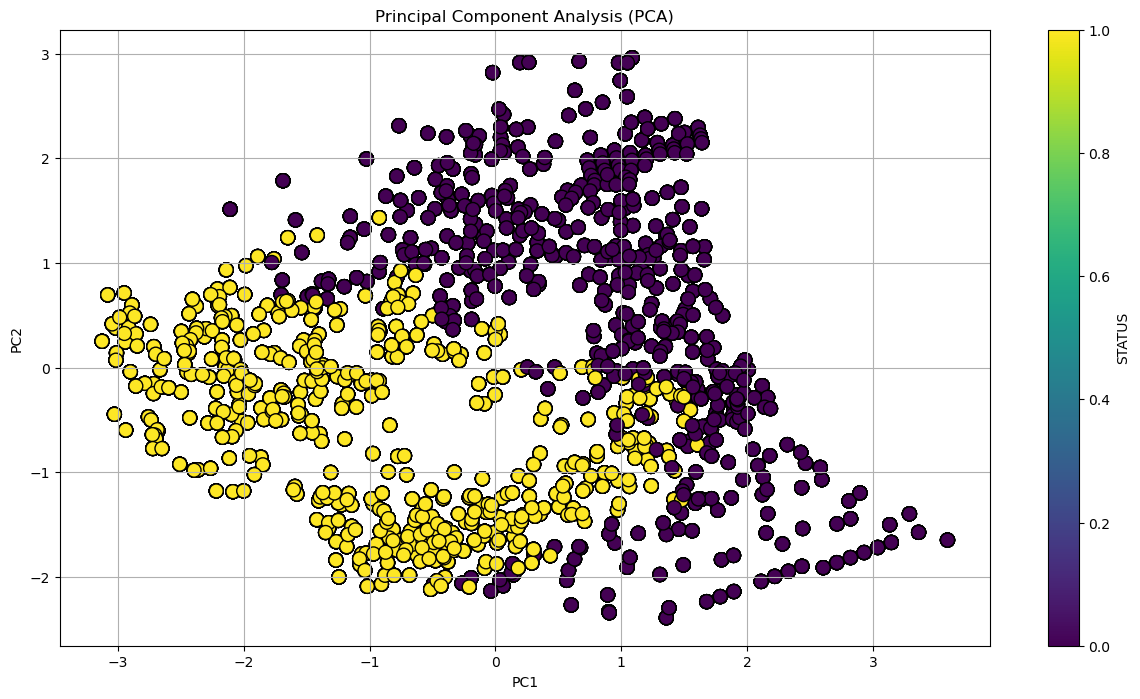

In [429]:
plt.figure(figsize=(15, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['STATUS'], cmap='viridis', edgecolor='k', s=100)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='STATUS')
plt.grid(True)
plt.show()

### The LDA decomposition could not be projected onto 2D because of the number of classes that STATUS has so I had to to it for n_components=1.

In [430]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, df['STATUS'])


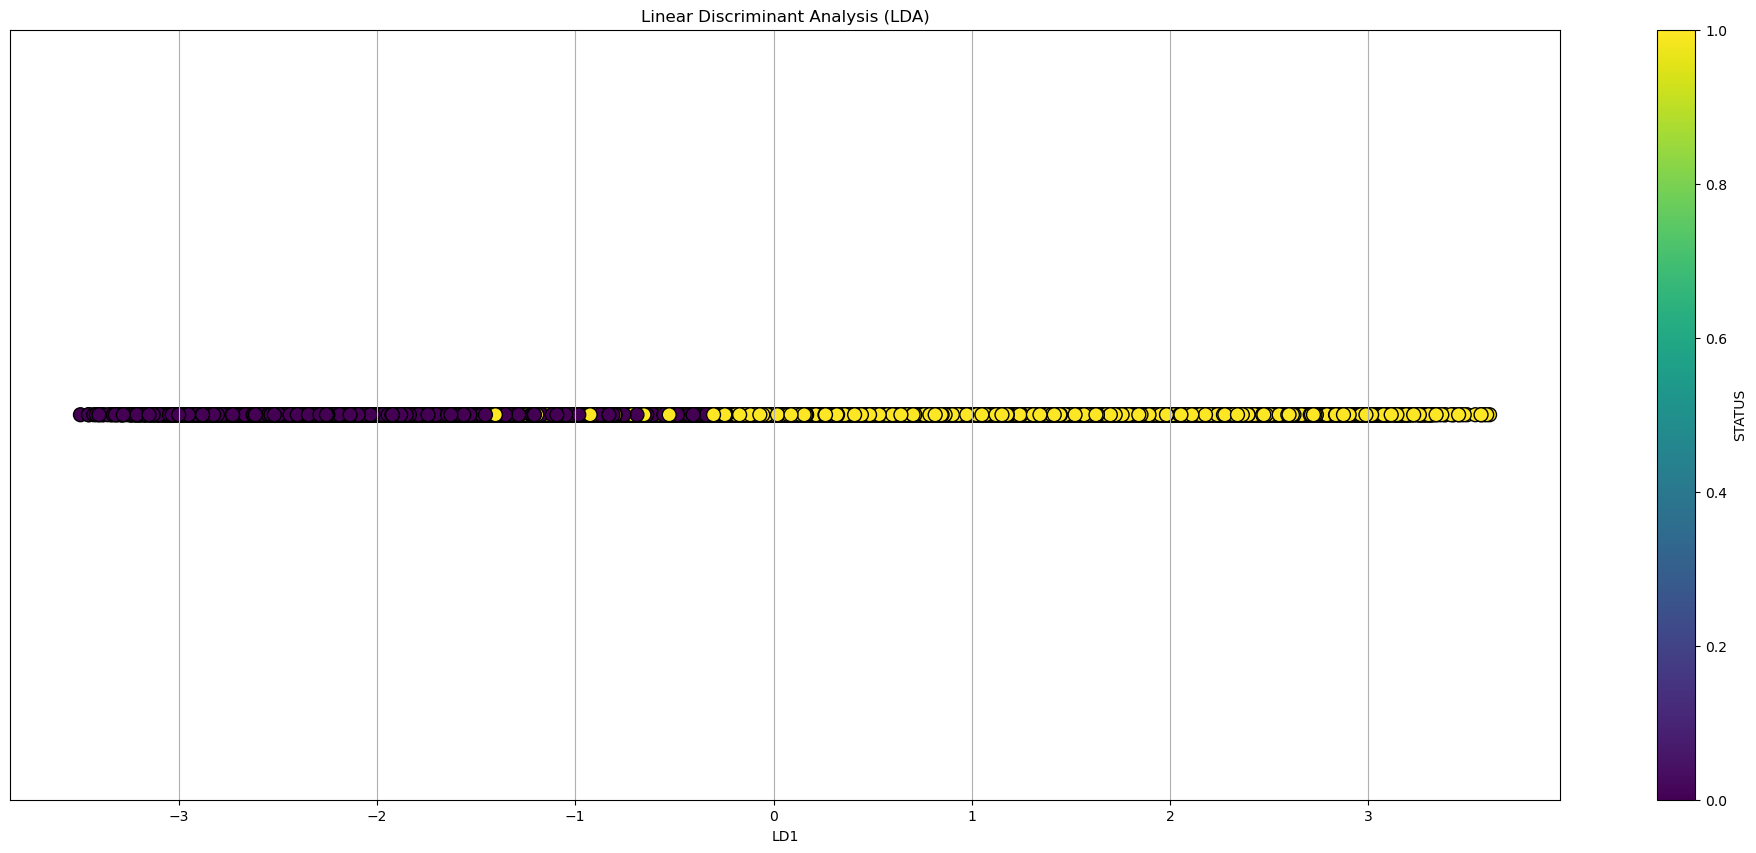

In [431]:
plt.figure(figsize=(25, 10))
plt.scatter(X_lda, [0] * len(X_lda), c=df['STATUS'], cmap='viridis', edgecolor='k', s=100)
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LD1')
plt.yticks([])
plt.colorbar(label='STATUS')
plt.grid(True)
plt.show()

### I took the getCM and experiment functions from the lecture notebooks. 

In [437]:
model = SVC(kernel="poly",C=1.05)
model.fit(X_scaled,y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.75)
y_predict = model.predict(X_test)
print(model.score(X_test, y_test))
print(classification_report(y_test,y_predict))

0.9183673469387755
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2167
           1       0.92      0.91      0.92      2194

    accuracy                           0.92      4361
   macro avg       0.92      0.92      0.92      4361
weighted avg       0.92      0.92      0.92      4361



In [418]:
def experiment(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [432]:
y= df['STATUS']

In [420]:
def getCM(X,y,model,test_size,train_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,train_size=train_size)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    model.score(X_test, y_test)
    return classification_report(y_test,y_predict)

### SVM gave a higher accuracy of 0.94 and it was better in all other measures. 

### Since we are investigating the status of the fire if it is extinguished or not, it is better to have false 'not extinguished' than a false 'extinguished' as it is dangerous to classify a fire extinguished when it is not. 


   In SVM, a precision of 0.94 for class 0 and 0.95 for class 1 indicates that when the model predicts a flame to be extinguished, it is correct 95% of the time, and when it predicts a flame to be not extinguished, it is correct 94% of the time. However in Logistic Regression, a precision of 0.86 for class 0 and 0.89 for class 1 indicates that when the model predicts a flame to be extinguished, it is correct 89% of the time, and when it predicts a flame to be non-extinguished, it is correct 86% of the time.


   Since recall measures the ability of the model to correctly identify true positives in the dataset, a recall of 0.95 for class 0 and 0.93 for class 1 indicates that the model correctly identifies 95% of non-extinguished flames and 93% of extinguished flames in SVM model. 
In Logistic Regression model it is a recall of 0.89 for class 0 and 0.85 for class 1 indicates that the model correctly identifies 89% of non-extinguished flames and 85% of extinguished flames. 


   So the Logistic Regression model is weaker identifying the fires that have been extinguished which may cause false alarms. 


Since the F1-score provides a balance between precision and recall, in the SVM model an F1-score of 0.94 for both classes mean a good balance between precision and recall for both extinguished and non-extinguished flames.
In logistic regression an F1-score of 0.87 for both classes is not too bad but in comparison to the SVM model it is weaker.

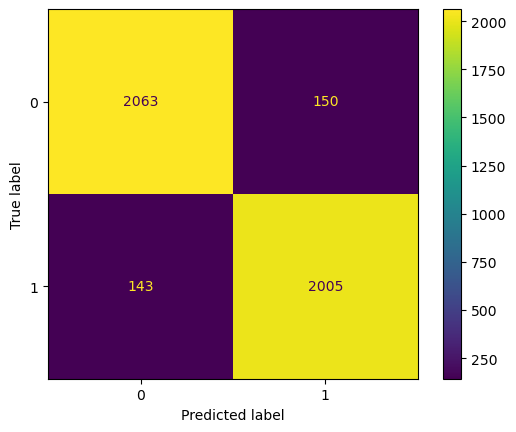

In [421]:
cm = experiment(X_scaled,y,SVC())
ConfusionMatrixDisplay(cm).plot()

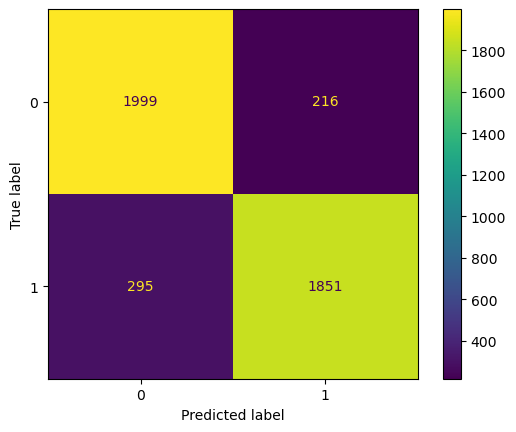

In [423]:
cm = experiment(X_scaled,y,LogisticRegression())
ConfusionMatrixDisplay(cm).plot()

In [388]:
print(getCM(X_scaled,y,SVC(),0.25,0.75))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2185
           1       0.95      0.93      0.94      2176

    accuracy                           0.94      4361
   macro avg       0.94      0.94      0.94      4361
weighted avg       0.94      0.94      0.94      4361



In [389]:
print(getCM(X_scaled,y,LogisticRegression(),0.25,0.75))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2178
           1       0.89      0.85      0.87      2183

    accuracy                           0.87      4361
   macro avg       0.87      0.87      0.87      4361
weighted avg       0.87      0.87      0.87      4361



In [395]:
model = ols('STATUS ~ SIZE + DISTANCE + DESIBEL+ AIRFLOW+ FREQUENCY',data=df).fit()
print(model.summary())
sm.stats.anova_lm(model,typ=1)

                            OLS Regression Results                            
Dep. Variable:                 STATUS   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     5811.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:00:33   Log-Likelihood:                -4106.5
No. Observations:               17442   AIC:                             8225.
Df Residuals:                   17436   BIC:                             8272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4446      0.036     12.223      0.0

,df,sum_sq,mean_sq,F,PR(>F)
SIZE,1.0,40.982494,40.982494,436.942456,7.492223e-96
DISTANCE,1.0,1808.706372,1808.706372,19283.858398,0.000000e+00
DESIBEL,1.0,11.700911,11.700911,124.751435,7.228792e-29
AIRFLOW,1.0,830.275523,830.275523,8852.136458,0.000000e+00
FREQUENCY,1.0,33.363203,33.363203,355.707973,1.465174e-78
Residual,17436.0,1635.388709,0.093794,NaN,NaN


### According to the LR model, DISTANCE and AIRFLOW are the variables that affect the STATUS column the most. 

# Q4

### I imported the data, reshaped it and removed the zero labeled data points. So we will have 9 different labels 

In [398]:
image = loadmat('/Users/senairemtoka/Downloads/PaviaU.mat')['paviaU']
gt = loadmat('/Users/senairemtoka/Downloads/PaviaU_gt.mat')['paviaU_gt']

In [399]:
vectors = image.reshape(-1, image.shape[2])
labels = gt.flatten()

In [400]:
non_zero_indices = np.where(labels != 0)
non_zero_indices

(array([    91,     92,     93, ..., 207343, 207344, 207345]),)

In [401]:
filtered_vectors = vectors[non_zero_indices]
filtered_labels = labels[non_zero_indices]
print("Filtered vectors shape:", filtered_vectors.shape)
print("Filtered labels shape:", filtered_labels.shape)

Filtered vectors shape: (42776, 103)
Filtered labels shape: (42776,)


In [402]:
unique_labels = np.unique(filtered_labels)
unique_labels 

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### I have two different functions for which I decided to use One Vs Rest Classifier. When I researched multi-label classification with logistic regression and SVC I came across to it.  

In [403]:
def multilabel_logistic_regression(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = OneVsRestClassifier(LogisticRegression(max_iter=5000))
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)

    precision_per_label = precision_score(y_test, y_pred, average=None)
    recall_per_label = recall_score(y_test, y_pred, average=None)
    f1_per_label = f1_score(y_test, y_pred, average=None)

    print("Accuracy:", accuracy)
    for i in range(len(precision_per_label)):
        print(f"Label {i + 1}:")
        print(f"  Precision: {precision_per_label[i]}")
        print(f"  Recall: {recall_per_label[i]}")
        print(f"  F1-score: {f1_per_label[i]}")

    return accuracy, conf_matrix

In [404]:
X_train, X_test, y_train, y_test = train_test_split(filtered_vectors, filtered_labels, test_size=0.25, random_state=42)
accuracy, LR_confusion_matrix = multilabel_logistic_regression(X_train, y_train, X_test, y_test)


Accuracy: 0.8601084720403965
Label 1:
  Precision: 0.791970802919708
  Recall: 0.9206060606060606
  F1-score: 0.8514573991031391
Label 2:
  Precision: 0.8842207163601161
  Recall: 0.9762719110731082
  F1-score: 0.9279691151071827
Label 3:
  Precision: 0.8636363636363636
  Recall: 0.7011070110701108
  F1-score: 0.7739307535641549
Label 4:
  Precision: 0.9342857142857143
  Recall: 0.8731642189586115
  F1-score: 0.9026915113871635
Label 5:
  Precision: 1.0
  Recall: 0.997093023255814
  F1-score: 0.9985443959243085
Label 6:
  Precision: 0.8472063854047891
  Recall: 0.5855003940110323
  F1-score: 0.6924510717614166
Label 7:
  Precision: 0.8034188034188035
  Recall: 0.2857142857142857
  F1-score: 0.42152466367713
Label 8:
  Precision: 0.7459634015069968
  Recall: 0.7475728155339806
  F1-score: 0.7467672413793104
Label 9:
  Precision: 1.0
  Recall: 0.9951456310679612
  F1-score: 0.9975669099756691


In [405]:
def multilabel_SVC(X_train, y_train, X_test, y_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = OneVsRestClassifier(SVC(max_iter=5000))
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    SVC_conf_matrix = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)

    precision_per_label = precision_score(y_test, y_pred, average=None)
    recall_per_label = recall_score(y_test, y_pred, average=None)
    f1_per_label = f1_score(y_test, y_pred, average=None)

    print("Accuracy:", accuracy)
    for i in range(len(precision_per_label)):
        print(f"Label {i + 1}:")
        print(f"  Precision: {precision_per_label[i]}")
        print(f"  Recall: {recall_per_label[i]}")
        print(f"  F1-score: {f1_per_label[i]}")

    return accuracy, SVC_conf_matrix



In [406]:
X_train, X_test, y_train, y_test = train_test_split(filtered_vectors, filtered_labels, test_size=0.25, random_state=42)
accuracy, SVC_confusion_matrix = multilabel_SVC(X_train, y_train, X_test, y_test)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.9128483261642042
Label 1:
  Precision: 0.8991793669402111
  Recall: 0.9296969696969697
  F1-score: 0.9141835518474375
Label 2:
  Precision: 0.9193420531113754
  Recall: 0.9916631038905516
  F1-score: 0.9541341011929249
Label 3:
  Precision: 0.8694581280788177
  Recall: 0.6512915129151291
  F1-score: 0.7447257383966245
Label 4:
  Precision: 0.9691444600280504
  Recall: 0.9225634178905207
  F1-score: 0.945280437756498
Label 5:
  Precision: 0.9970845481049563
  Recall: 0.9941860465116279
  F1-score: 0.9956331877729258
Label 6:
  Precision: 0.964509394572025
  Recall: 0.7281323877068558
  F1-score: 0.8298158958239784
Label 7:
  Precision: 0.8849206349206349
  Recall: 0.6778115501519757
  F1-score: 0.7676419965576593
Label 8:
  Precision: 0.7988721804511278
  Recall: 0.9169363538295577
  F1-score: 0.8538422903063788
Label 9:
  Precision: 1.0
  Recall: 1.0
  F1-score: 1.0


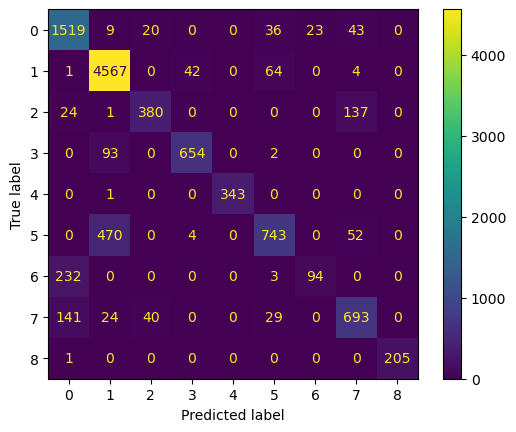

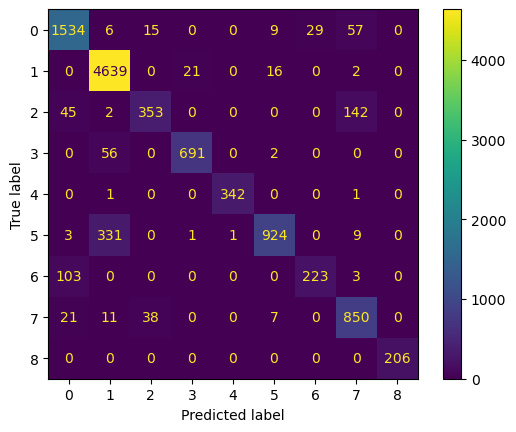

In [407]:
ConfusionMatrixDisplay(LR_confusion_matrix).plot()

ConfusionMatrixDisplay(SVC_confusion_matrix).plot()


### My conclusions are that SVC is much better at recognizing some labels for example label 7. Logistic regression mislabeled 7 as label 0 a significant amount of times while SVC did not make such drastic mislabeling. Both models are good at labeling label 8 correctly.  Logistic Regression also mistaked label 0 and label 1 for other labels more than SVC model did. However some of the mislabelings they did are for the same labels.  The accuracy for the SVC model came out 0.91 where the Logistic Regression had 0.86.